# Fitting a Hologram

This notebook shows how to load a pre-recorded hologram of a colloidal sphere
into a Feature object and analyze it with Lorenz-Mie theory. The analysis yields
the radius of the sphere, the refractive index of the sphere, and the sphere's
three-dimensional location relative to the center of the imaging plane.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
import cv2

from pylorenzmie.utilities import configuration as config
config.use_catch = True
from pylorenzmie.analysis import Frame

## Framework for Lorenz-Mie analysis
First, we instantiate a Frame() object. By default, Frame analyzes features with 
the standard Lorenz-Mie model for hologram formation. The model includes a description of the holographic microscope that records the images we wish to analyze. In this example, we specify that the instrument illuminates the sample with blue light at a vacuum wavelength of $\lambda$ = 0.447 μm and has a system magnification of 0.048 μm/pixel. For particles dispersed in water, the refractive index of the medium is $n_m$ = 1.340 at the imaging wavelength. These calibration constants may differ for different hardware implementations.
The commercial xSight instrument, for example, uses a system magnification of 0.120 μm/pixel.

In [2]:
configuration = dict(wavelength = 0.447,    # [um]
                     magnification = 0.048, # [um/pixel]
                     n_m = 1.34, 
                     distribution = 'radial',
                     percentpix = 0.1)

frame = Frame(**configuration)

Adding autoShape... 


## Read in holographic microscopy data
Next, we load the (normalized) hologram we wish to fit. In the present example, we use OpenCV to load a pre-recorded hologram that was saved as a PNG image. We convert the image to grayscale and normalize it by the mean value. This hologram was cropped from a larger image. Since we are not interested in locating the particle within the original image, we provide the model with a standard coordinate system using the coordinates() helper function. We finally can provide the normalized image data to the Feature() object for analysis.

In [3]:
def report(frame, results):
    fig, ax = plt.subplots(figsize=(8,8))
    ax.imshow(frame.data, cmap='gray')
    ax.scatter(results.x_p, results.y_p, c='r')
    for bbox in frame.bboxes:
        ax.add_patch(Rectangle(*bbox, fill=False, ec='r'))
    print(results)

In [4]:
img = cv2.imread('tutorials/PS_silica.png', 0).astype(float)
img /= np.mean(img)

## Load the recorded image into the Frame

In [5]:
results = frame.analyze(img)

          x_p      dx_p         y_p      dy_p         z_p      dz_p       a_p  \
0  376.436651  0.021037  481.863587  0.020265  181.398792  0.107312  0.770716   
1  907.701059  0.038405  484.800098  0.037557  179.284287  0.162795  0.497616   

       da_p       n_p      dn_p  success   npix    redchi  
0  0.001309  1.560170  0.000640     True  10956  2.874142  
1  0.001902  1.425474  0.000747     True  12744  0.908373  


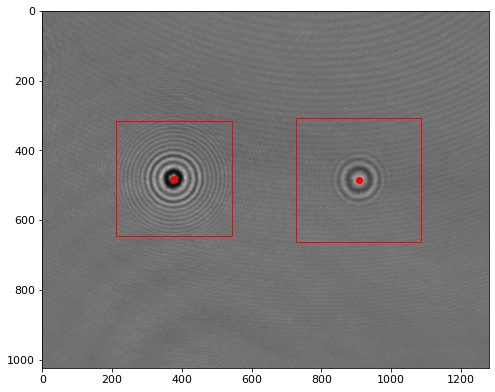

In [6]:
report(frame, results)

## Now that it's all set up, run it again

           x_p       dx_p         y_p      dy_p         z_p       dz_p  \
0   562.383205   0.060300  720.366355  0.056068  173.869472   0.220150   
1   920.069386   0.064417  732.493446  0.060119  176.039943   0.237283   
2   758.916147   5.011510  391.035644  4.516640  151.167258  14.930811   
3  1107.318328  11.138779  204.396318  9.405078  103.631405  21.984497   

        a_p      da_p       n_p      dn_p  success   npix    redchi  
0  2.091260  0.002332  1.370236  0.000124     True  29376  6.896856  
1  2.051511  0.002404  1.368770  0.000118     True  29811  6.778378  
2  0.433814  0.211257  1.338685  0.001639     True  34928  2.668909  
3  0.194980  0.725461  1.341407  0.012495     True  12040  1.534819  


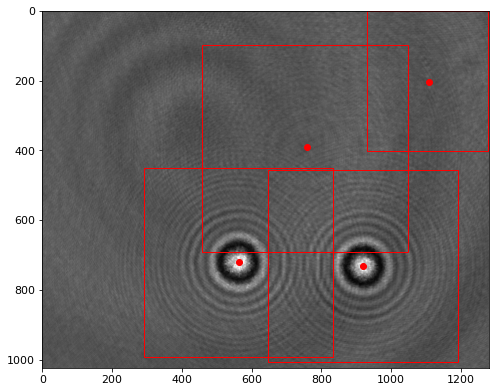

In [7]:
img = cv2.imread('tutorials/image0010.png', 0).astype(float)
img /= np.mean(img)
results = frame.analyze(img)
report(frame, results)